<div align="center">

# Final Project

ECON 294A, UC Santa Cruz

Cuauhtemoc Garcia 

    "Unemployment Rates Vs. Violent & Property Crime in the U.S."

</div>


I found my original proposition somewhat daunting, so I decided to focus on the relationship between unemployment rates and crime in major U.S. states. I selected five major states (California, Texas, New York, Florida, Illinois) and included the national average for the USA. This analysis aims to explore the relationship between unemployment rates and crime rates (both violent and property crimes) across these regions over the period from 2000 to 2020. The key independent variable is the unemployment rate, while the dependent variables are the violent crime rate and property crime rate. Additionally, median household income and poverty rates are included as control variables to account for socioeconomic factors that might influence crime rates.

The data for unemployment rates, violent crime rates, property crime rates, median household incomes, and poverty rates for each state and the USA were compiled into separate pandas DataFrames. These datasets were then merged on the 'DATE' column to create a comprehensive dataset for analysis. The merged dataset was carefully examined to ensure the correct application of suffixes to avoid any column naming conflicts. Data for federal and state violent crime rates as well as property crimes were sourced from the "Uniform Crimes Reporting Stats" from the Federal Bureau of Investigation (FBI) website. Data for unemployment rates, median household income, and poverty rates were taken from the Federal Reserve of St. Louis (FRED)'s online historical compilation.

For each state and the national average, multiple regression analyses were conducted using the "StatsModels" library in Python. The predictors for each regression model included the unemployment rate, median household income, and poverty rate, with a constant term added to the model. Two regression models were run for each state: one for violent crime rates and another for property crime rates. The regression results provided insights into how changes in unemployment rates, income levels, and poverty rates impact crime rates.

To assess any potential multicollinearity among the predictors, the Variance Inflation Factor (VIF) was calculated for each predictor in the model. High VIF values indicate a high correlation among the predictors, which can inflate the standard errors and make it difficult to assess the individual impact of each predictor on the dependent variable. The VIF values were printed for each state to identify any potential multicollinearity issues.

Additionally, visualizations were created to compare the actual and predicted crime rates over time. Line plots for each state displayed the actual violent and property crime rates alongside the predicted rates from the regression models. These plots provided a visual representation of the model's accuracy in capturing the trends and variations in crime rates over the analyzed period.

My hypothesis is that there is a positive correlation between unemployment rates and crime rates. The underlying rationale is that higher unemployment may lead to increased financial strain and social instability, potentially resulting in higher crime rates as individuals struggle to meet their needs through lawful means. It seems intuitive of course. 

However, the strength and consistency of this relationship are uncertain. Crime rates are influenced by a multitude of factors, including economic conditions, social services, law enforcement practices, demographic changes, and cultural influences. Therefore, while an increase in unemployment is expected to correlate with a rise in crime rates, the degree of this impact may vary across different states and crime types. By including control variables such as median household income and poverty rates, my analysis aims to isolate the effect of unemployment on crime and provide a clearer understanding of this relationship.

 











## Relevant sources 

https://www.fbi.gov/

https://fred.stlouisfed.org/


## Load libraries

Load essential libraries for the project 

In [72]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Load Data

Load / define essential data for the project 

In [73]:
# Define the data for each dataset
unemployment_data = {
    'DATE': list(range(2000, 2021)),
    'California': [4.925, 5.466666667, 6.758333333, 6.891666667, 6.216666667, 5.383333333, 4.916666667, 5.308333333, 7.3, 11.54166667, 12.45833333, 11.89166667, 10.525, 9.033333333, 7.566666667, 6.225, 5.516666667, 4.833333333, 4.258333333, 4.1, 10.19166667],
    'Texas': [4.383333333, 4.958333333, 6.358333333, 6.733333333, 6.016666667, 5.458333333, 5, 4.366666667, 4.866666667, 7.541666667, 8.191666667, 8.016666667, 6.708333333, 6.3, 5.191666667, 4.483333333, 4.65, 4.341666667, 3.9, 3.525, 7.725],
    'New York': [4.508333333, 4.875, 6.2, 6.4, 5.791666667, 4.958333333, 4.533333333, 4.433333333, 5.408333333, 8.366666667, 8.716666667, 8.358333333, 8.625, 7.791666667, 6.291666667, 5.233333333, 4.875, 4.633333333, 4.1, 3.858333333, 9.891666667],
    'Florida': [3.75833333, 4.425, 4.95833333, 4.46666667, 3.75, 2.875, 2.46666667, 3.3, 5.69166667, 9.55833333, 10.825, 10, 8.66666667, 7.53333333, 6.43333333, 5.525, 4.91666667, 4.3, 3.65, 3.25, 8.19166667],
    'Illinois': [4.44166667, 5.43333333, 6.55, 6.725, 6.175, 5.71666667, 4.6, 5.06666667, 6.50833333, 10.1833333, 10.4666667, 9.75833333, 9.05, 9.075, 7.16666667, 5.99166667, 5.88333333, 4.95, 4.4, 3.96666667, 9.30833333],
    'USA': [3.425, 4.166666667, 5.191666667, 5.383333333, 4.933333333, 4.491666667, 4.075, 4.083333333, 5.191666667, 8.616666667, 8.975, 8.341666667, 7.45, 6.766666667, 5.65, 4.841666667, 4.45, 3.983333333, 3.566666667, 3.333333333, 7.733333333]
}

violent_crime_data = {
    'DATE': list(range(2000, 2021)),
    'California': [621.6, 615.2, 595.4, 579.6, 527.8, 526, 533.5, 524.1, 504.2, 473.3, 439.6, 411.2, 423.5, 402.6, 396.4, 428, 444.8, 453.3, 447.5, 442.1, 442],
    'Texas': [545.1, 571.6, 579.7, 553.1, 540.9, 528.1, 517.3, 510.4, 508, 491, 448.4, 408.6, 408.6, 410.3, 406.7, 412.7, 433.8, 437.8, 412.9, 421.8, 446.5],
    'New York': [553.9, 513.6, 496.6, 465.8, 440.4, 444.4, 435.2, 414.4, 397.9, 384.4, 394.4, 397.2, 406.3, 393.8, 384.7, 380.4, 374.6, 361.1, 350.8, 361, 363.8],
    'Florida': [812, 798.3, 771.2, 731.1, 711.8, 708.9, 716.4, 722.6, 688.9, 612.5, 541.3, 514.6, 487, 469.3, 458.9, 462.5, 429.4, 408.1, 385.9, 378.2, 431.9],
    'Illinois': [653.8, 633.1, 601.9, 556.4, 545.7, 552.2, 541.6, 533.2, 525.4, 497.2, 444.9, 424, 416.2, 403.1, 370.9, 387.5, 436.7, 436.2, 411.4, 415.3, 425.9],
    'USA': [506.5, 504.5, 494.4, 475.8, 463.2, 469, 479.3, 471.8, 458.6, 431.9, 404.5, 387.1, 387.8, 369.1, 361.6, 373.7, 397.5, 394.9, 383.4, 380.8, 398.5]
}

property_crime_data = {
    'DATE': list(range(2000, 2021)),
    'California': [3118.2, 3278, 3361.2, 3426.4, 3423.9, 3320.6, 3181.7, 3043.5, 2941, 2731, 2629.9, 2584.2, 2761.8, 2651.2, 2441.7, 2628.4, 2550, 2505.3, 2386.2, 2335.8, 2138.9],
    'Texas': [4410.4, 4570, 4620.1, 4599.9, 4497.7, 4319, 4083.1, 4122.3, 3986.8, 4015.3, 3766.8, 3483.2, 3363.1, 3253.2, 3015.4, 2840.8, 2759, 2553.2, 2379.2, 2405.6, 2245],
    'New York': [2545.7, 2399.9, 2310.5, 2249, 2192.5, 2101.9, 2064.5, 1987.9, 1993.8, 1932, 1957.8, 1906.7, 1917, 1820.7, 1717.1, 1606.4, 1538.7, 1497.6, 1441.6, 1386.1, 1410.7],
    'Florida': [4882.7, 4779.2, 4656.4, 4457.3, 4182.5, 4012.8, 3986.2, 4088.8, 4140.5, 3840.8, 3551.4, 3517.4, 3276.2, 3097.8, 2932.7, 2816.9, 2681, 2512.9, 2287.8, 2144.8, 1961.4],
    'Illinois': [3585.4, 3471.6, 3420.2, 3287.9, 3174.1, 3091.7, 3019.6, 2935.8, 2932.6, 2736.9, 2718.1, 2678.7, 2585.5, 2296.6, 2093.2, 2001.4, 2051, 1995.2, 1938.8, 1855.5, 1559.4],
    'USA': [3618.3, 3658.1, 3630.6, 3591.2, 3514.1, 3431.5, 3346.6, 3276.4, 3214.6, 3041.3, 2945.9, 2905.4, 2868, 2733.6, 2574.1, 2500.5, 2451.6, 2362.9, 2209.8, 2130.6, 1958.2]
}

median_hh_income_data = {
    'DATE': list(range(2000, 2021)),
    'California': [75230, 74270, 73630, 74960, 73010, 74610, 77490, 76120, 75120, 74260, 70840, 67540, 70800, 74580, 73170, 77030, 79960, 82580, 81480, 88960, 87530],
    'Texas': [62040, 64210, 62320, 59710, 61400, 59710, 60670, 62900, 61250, 62800, 61680, 62080, 64480, 63070, 65170, 68360, 69770, 70860, 69100, 76820, 77110],
    'New York': [65470, 66180, 65140, 65060, 66230, 68010, 67550, 66850, 66480, 66430, 64960, 64090, 59200, 61300, 65690, 70210, 73720, 72570, 77760, 81840, 77400],
    'Florida': [62440, 57230, 59020, 59250, 60120, 61970, 63990, 62550, 59100, 60360, 57500, 57090, 57210, 59540, 55810, 59100, 61400, 62600, 63160, 66480, 65110],
    'Illinois': [74020, 72550, 66290, 68650, 68340, 69770, 68180, 71710, 70160, 69940, 66200, 64090, 64240, 66170, 66430, 73130, 73650, 77790, 81080, 84740, 83790],
    'USA': [67470, 66360, 65820, 65860, 65760, 66780, 67520, 68610, 66280, 65850, 64300, 63350, 63350, 65740, 64900, 68410, 70840, 72090, 73030, 78250, 76660]
}

poverty_rates_all_ages_data = {
    'DATE': list(range(2000, 2021)),
    'California': [12.7, 12.9, 13.3, 13.7, 13.2, 13.3, 13.1, 12.4, 13.3, 14.2, 15.8, 16.6, 17.0, 16.8, 16.4, 15.4, 14.4, 13.3, 12.8, 11.8, 11.5],
    'Texas': [14.6, 15, 15.4, 16.2, 16.2, 17.5, 16.9, 16.3, 15.8, 17.1, 17.9, 18.5, 17.9, 17.5, 17.2, 15.9, 15.6, 14.7, 14.9, 13.6, 13.4],
    'New York': [13.2, 13.7, 13.9, 14.3, 14.5, 13.9, 14.2, 13.8, 13.7, 14.2, 15, 16.1, 15.9, 16, 16, 15.5, 14.8, 14.1, 13.7, 13.1, 12.7],
    'Florida': [11.7, 12.6, 12.8, 13, 11.9, 12.8, 12.6, 12.1, 13.3, 15, 16.5, 17, 17.2, 17.1, 16.6, 15.8, 14.8, 14.1, 13.7, 12.7, 12.4],
    'Illinois': [10, 10.1, 11.3, 11.4, 11.9, 12, 12.3, 11.9, 12.2, 13.3, 13.8, 14.9, 14.7, 14.6, 14.3, 13.6, 13, 12.5, 12.1, 11.4, 11],
    'USA': [11.3, 11.7, 12.1, 12.5, 12.7, 13.3, 13.3, 13, 13.2, 14.3, 15.3, 15.9, 15.9, 15.8, 15.5, 14.7, 14, 13.4, 13.1, 12.3, 11.9]
}



## Organize data to ensure there are no missing values or overlap

In [79]:
# Convert the data to pandas DataFrames
unemployment_df = pd.DataFrame(unemployment_data)
violent_crime_df = pd.DataFrame(violent_crime_data)
property_crime_df = pd.DataFrame(property_crime_data)
median_hh_income_df = pd.DataFrame(median_hh_income_data)
poverty_rates_all_ages_df = pd.DataFrame(poverty_rates_all_ages_data)

# Normalize the crime data to be per 100,000 people
for df in [violent_crime_df, property_crime_df]:
    for col in df.columns:
        if col != 'DATE':
            df[col] = df[col] / 1000

# Rename columns in the poverty data to ensure unique suffix
poverty_rates_all_ages_df = poverty_rates_all_ages_df.rename(columns=lambda x: x if x == 'DATE' else x + '_pov')

# Merge the datasets on DATE
merged_df = unemployment_df.merge(violent_crime_df, on='DATE', suffixes=('_unemp', '_viol'))
merged_df = merged_df.merge(property_crime_df, on='DATE', suffixes=('', '_prop'))
merged_df = merged_df.rename(columns=lambda x: x if x in ['DATE'] else x + '_prop' if x in property_crime_df.columns and x != 'DATE' else x)
merged_df = merged_df.merge(median_hh_income_df, on='DATE', suffixes=('', '_inc'))
merged_df = merged_df.rename(columns=lambda x: x if x in ['DATE'] else x + '_inc' if x in median_hh_income_df.columns and x != 'DATE' else x)
merged_df = merged_df.merge(poverty_rates_all_ages_df, on='DATE')


## Run final regressions and plot data to illustrate findings 

Regression results for California_violent:
                            OLS Regression Results                            
Dep. Variable:        California_viol   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     21.87
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.52e-06
Time:                        17:51:25   Log-Likelihood:                 91.150
No. Observations:                  21   AIC:                            -174.3
Df Residuals:                      17   BIC:                            -170.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

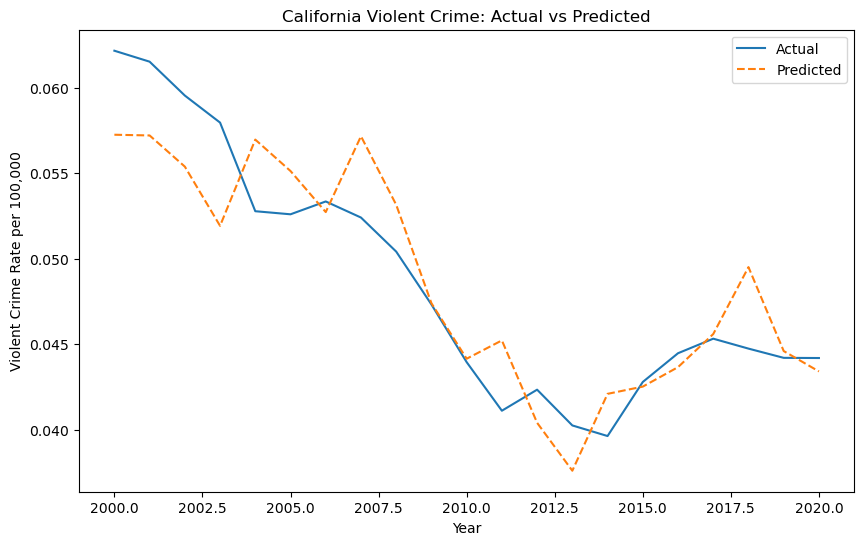

Regression results for California_property:
                            OLS Regression Results                            
Dep. Variable:        California_prop   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     20.00
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           8.15e-06
Time:                        17:51:25   Log-Likelihood:                 54.380
No. Observations:                  21   AIC:                            -100.8
Df Residuals:                      17   BIC:                            -96.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

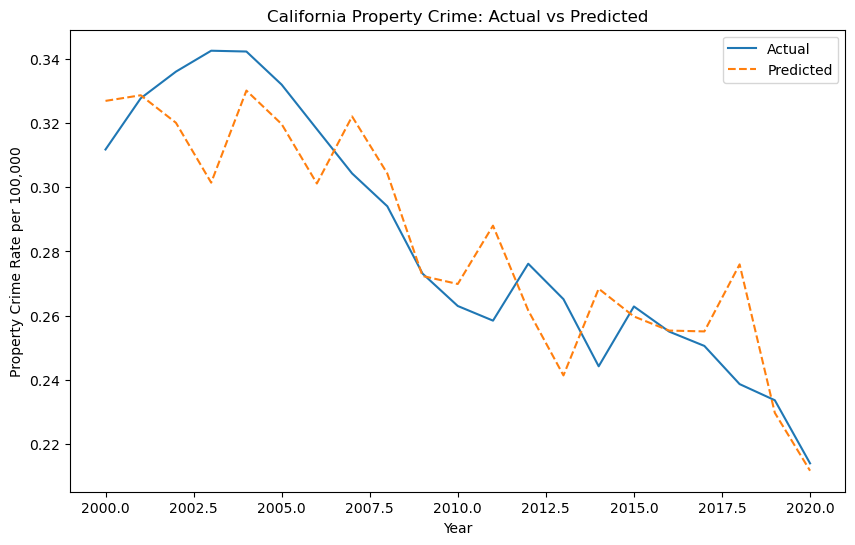

Regression results for Texas_violent:
                            OLS Regression Results                            
Dep. Variable:             Texas_viol   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     30.75
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.32e-07
Time:                        17:51:25   Log-Likelihood:                 97.162
No. Observations:                  21   AIC:                            -186.3
Df Residuals:                      17   BIC:                            -182.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

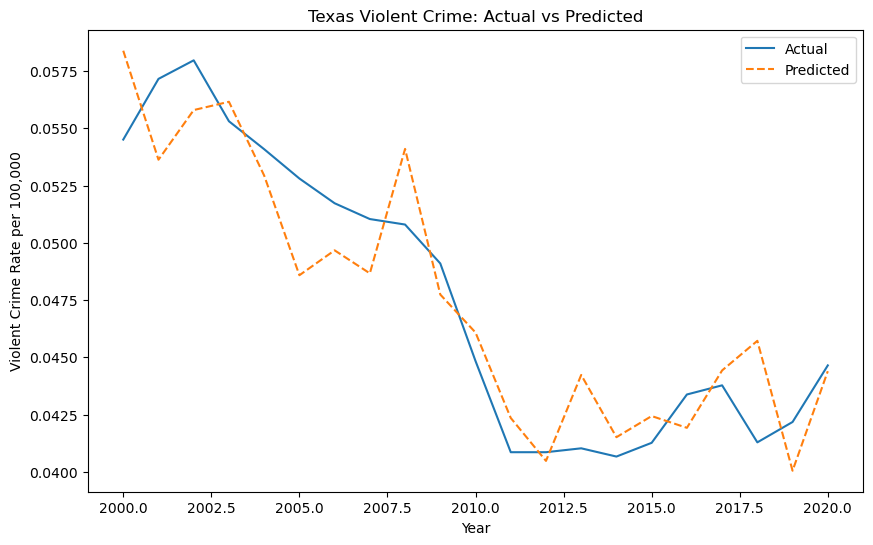

Regression results for Texas_property:
                            OLS Regression Results                            
Dep. Variable:             Texas_prop   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     43.81
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           3.26e-08
Time:                        17:51:26   Log-Likelihood:                 45.966
No. Observations:                  21   AIC:                            -83.93
Df Residuals:                      17   BIC:                            -79.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const      

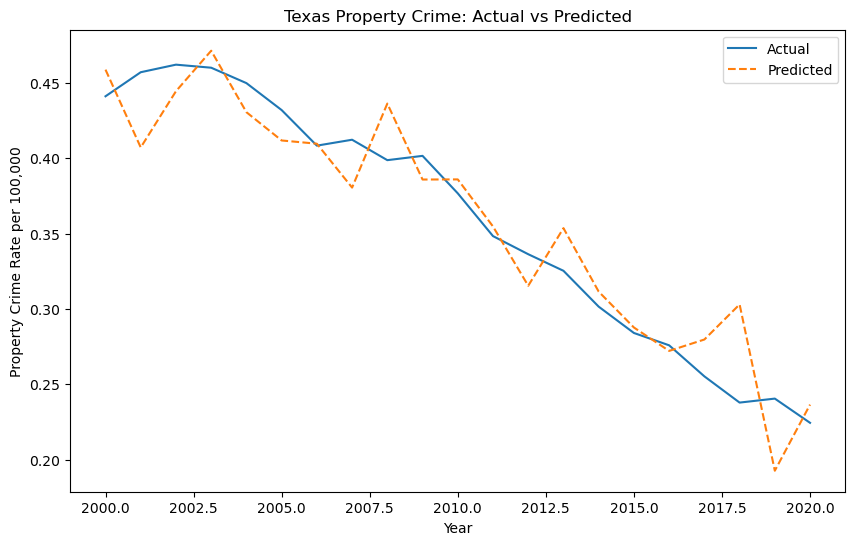

Regression results for New York_violent:
                            OLS Regression Results                            
Dep. Variable:          New York_viol   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     12.91
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           0.000121
Time:                        17:51:27   Log-Likelihood:                 92.714
No. Observations:                  21   AIC:                            -177.4
Df Residuals:                      17   BIC:                            -173.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
con

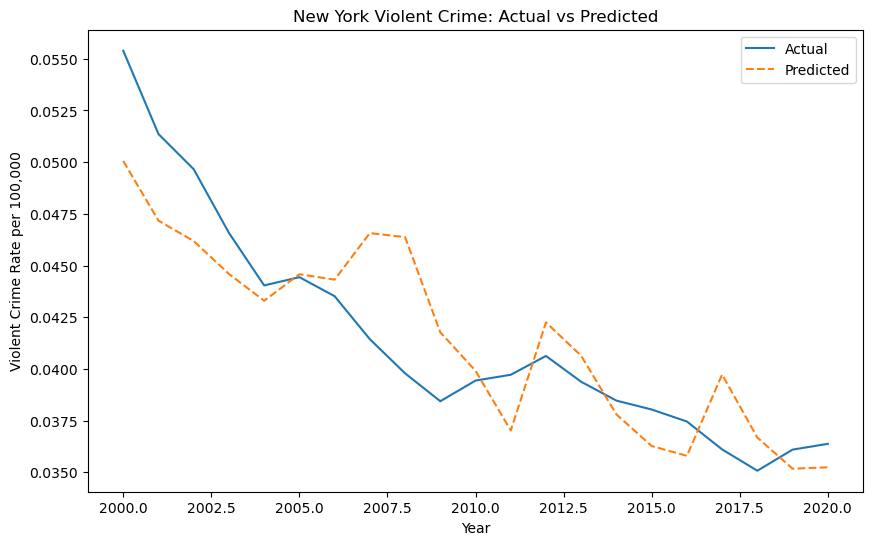

Regression results for New York_property:
                            OLS Regression Results                            
Dep. Variable:          New York_prop   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     32.82
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.71e-07
Time:                        17:51:27   Log-Likelihood:                 62.062
No. Observations:                  21   AIC:                            -116.1
Df Residuals:                      17   BIC:                            -111.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
co

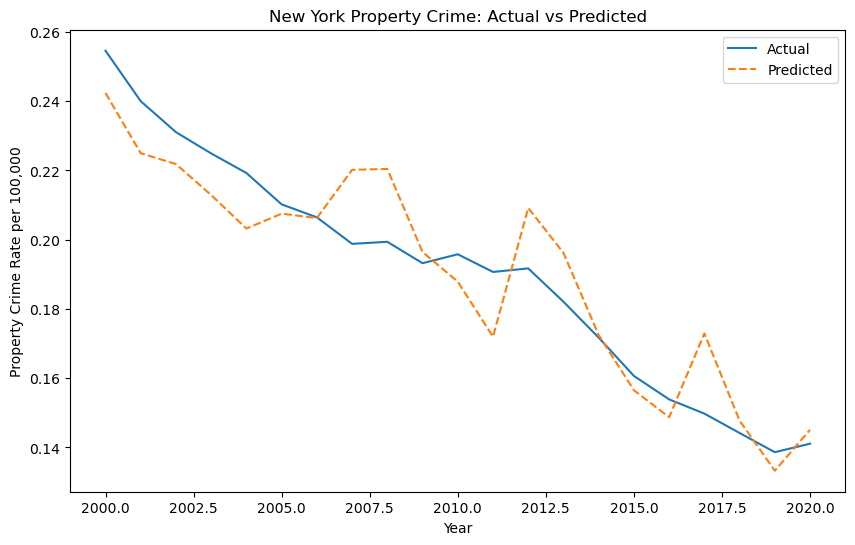

Regression results for Florida_violent:
                            OLS Regression Results                            
Dep. Variable:           Florida_viol   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     14.42
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           6.32e-05
Time:                        17:51:27   Log-Likelihood:                 72.097
No. Observations:                  21   AIC:                            -136.2
Df Residuals:                      17   BIC:                            -132.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

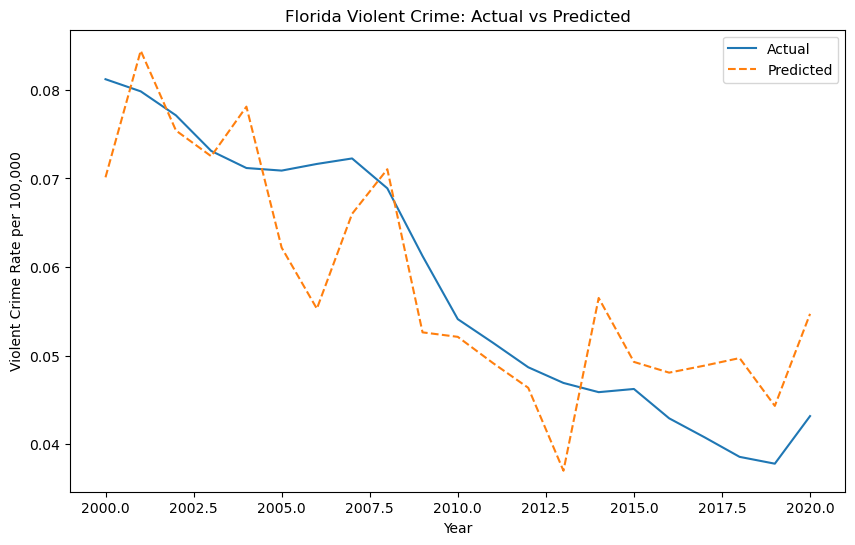

Regression results for Florida_property:
                            OLS Regression Results                            
Dep. Variable:           Florida_prop   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     10.96
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           0.000304
Time:                        17:51:28   Log-Likelihood:                 32.744
No. Observations:                  21   AIC:                            -57.49
Df Residuals:                      17   BIC:                            -53.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const

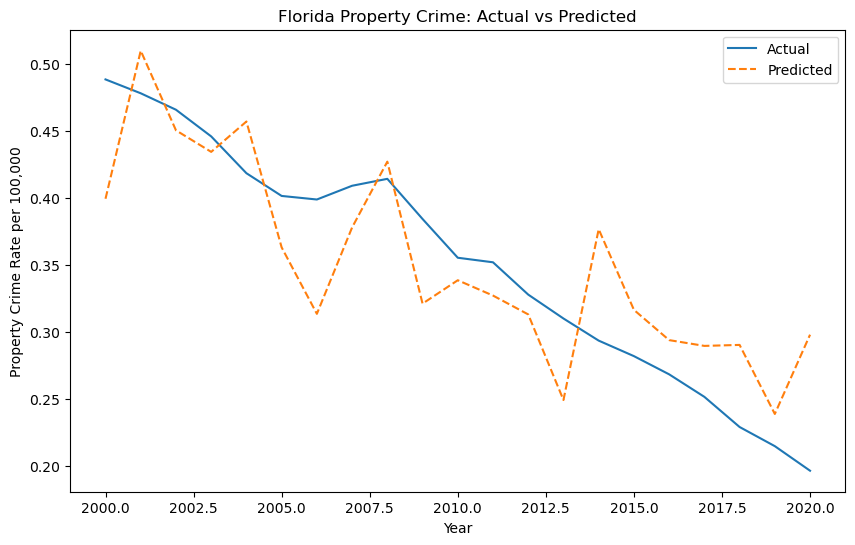

Regression results for Illinois_violent:
                            OLS Regression Results                            
Dep. Variable:          Illinois_viol   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     81.61
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.68e-10
Time:                        17:51:28   Log-Likelihood:                 99.699
No. Observations:                  21   AIC:                            -191.4
Df Residuals:                      17   BIC:                            -187.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
con

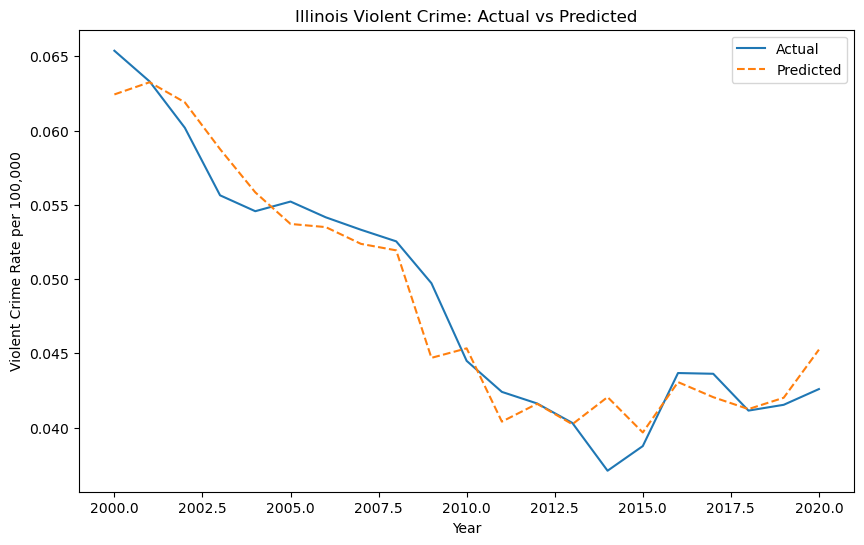

Regression results for Illinois_property:
                            OLS Regression Results                            
Dep. Variable:          Illinois_prop   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     63.97
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.81e-09
Time:                        17:51:29   Log-Likelihood:                 55.989
No. Observations:                  21   AIC:                            -104.0
Df Residuals:                      17   BIC:                            -99.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
co

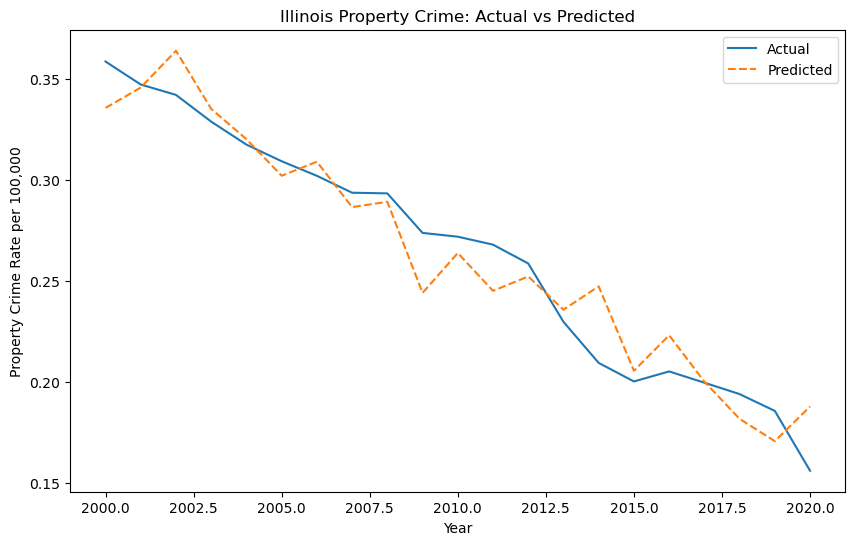

Regression results for USA_violent:
                            OLS Regression Results                            
Dep. Variable:               USA_viol   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     56.86
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.51e-09
Time:                        17:51:29   Log-Likelihood:                 107.42
No. Observations:                  21   AIC:                            -206.8
Df Residuals:                      17   BIC:                            -202.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

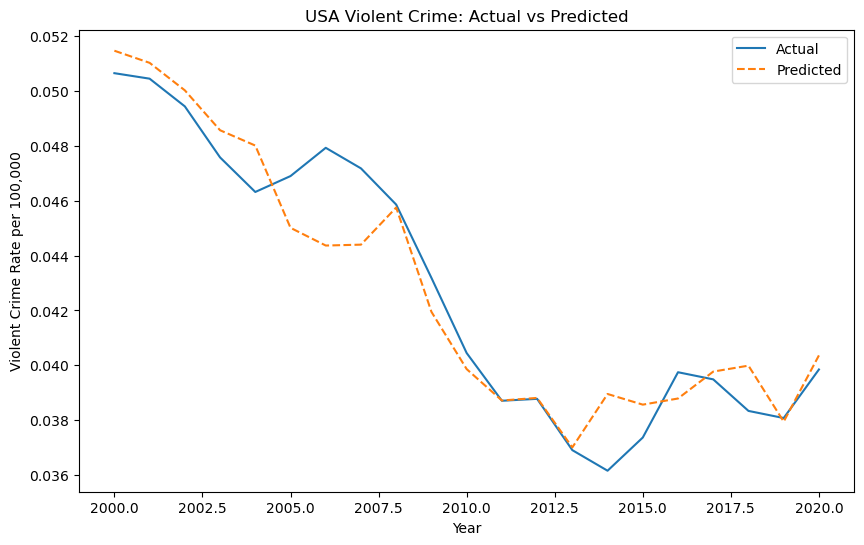

Regression results for USA_property:
                            OLS Regression Results                            
Dep. Variable:               USA_prop   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     78.20
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           3.76e-10
Time:                        17:51:30   Log-Likelihood:                 60.164
No. Observations:                  21   AIC:                            -112.3
Df Residuals:                      17   BIC:                            -108.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

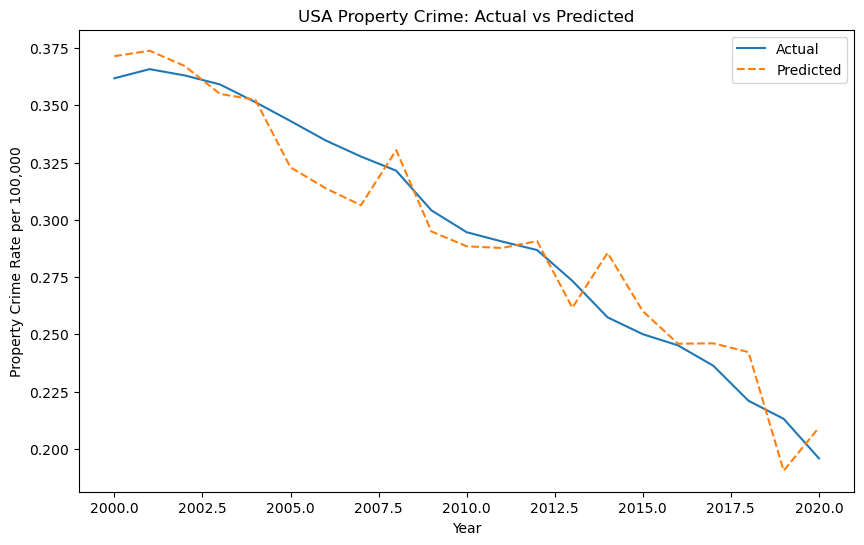

In [80]:
# Prepare the data for regression
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 'USA']

for state in states:
    X = merged_df[[f'{state}_unemp', f'{state}_inc', f'{state}_pov']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    
    # Run regression for violent crime
    y_violent = merged_df[f'{state}_viol']
    model_violent = sm.OLS(y_violent, X).fit()
    print(f'Regression results for {state}_violent:')
    print(model_violent.summary())
    print('\n\n')

    # Plot actual vs predicted for violent crime
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df['DATE'], y_violent, label='Actual')
    plt.plot(merged_df['DATE'], model_violent.predict(X), label='Predicted', linestyle='--')
    plt.title(f'{state} Violent Crime: Actual vs Predicted')
    plt.xlabel('Year')
    plt.ylabel('Violent Crime Rate per 100,000')
    plt.legend()
    plt.show()
    
    # Run regression for property crime
    y_property = merged_df[f'{state}_prop']
    model_property = sm.OLS(y_property, X).fit()
    print(f'Regression results for {state}_property:')
    print(model_property.summary())
    print('\n\n')

    # Plot actual vs predicted for property crime
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df['DATE'], y_property, label='Actual')
    plt.plot(merged_df['DATE'], model_property.predict(X), label='Predicted', linestyle='--')
    plt.title(f'{state} Property Crime: Actual vs Predicted')
    plt.xlabel('Year')
    plt.ylabel('Property Crime Rate per 100,000')
    plt.legend()
    plt.show()

    

## Analysis of Regressions
 
California's regression results indicate that the models have moderate explanatory power, with R-squared values of 0.779 for property crime and 0.794 for violent crime. The unemployment rate has a significant negative impact on both property and violent crime rates, contrary to typical expectations. Median household income and poverty rates also show significant negative correlations with crime rates, suggesting that higher income levels and lower poverty can reduce crime.

In Texas, the regression results show high R-squared values for property crime (0.885) and violent crime (0.844). The unemployment rate is a significant predictor for violent crime but not for property crime. Median household income has a significant negative impact on both crime types, while poverty rates are positively associated with crime. These findings suggest that improving economic conditions in Texas can lead to a reduction in crime rates.

For New York, the models for property crime (R-squared: 0.853) and violent crime (R-squared: 0.695) also show substantial explanatory power. The unemployment rate has a negative and significant impact on both property and violent crime rates. Median household income and poverty rates exhibit significant negative correlations with crime rates, indicating that higher income levels and lower poverty rates can help reduce crime in New York.

In Florida, the R-squared values for property crime (0.659) and violent crime (0.718) indicate moderate explanatory power. The unemployment rate is not a significant predictor for either crime type. Median household income has a significant negative effect on both property and violent crime rates, while poverty rates are positively associated with both types of crime. These results suggest that improving economic conditions in Florida, such as increasing income levels and reducing poverty, can lead to lower crime rates.

For Illinois, the regression results show high R-squared values for both property crime (0.919) and violent crime (0.935), indicating that the models explain a significant portion of the variance in crime rates. The coefficients for unemployment rates are not statistically significant in either model, suggesting that changes in unemployment rates do not significantly impact crime rates in Illinois. However, both median household income and poverty rates show significant negative correlations with crime rates, implying that higher income levels and lower poverty rates are associated with reduced crime.

The regression results for the USA reveal some interesting insights. For violent crime, the R-squared value is 0.909, indicating that approximately 90.9% of the variance in the violent crime rate can be explained by the model's predictors. The coefficients for unemployment rate and median income are negative, while the coefficient for the poverty rate is also negative, suggesting that higher poverty rates are associated with higher violent crime rates. However, the coefficient for the unemployment rate is not statistically significant (p = 0.687), suggesting it does not have a strong influence on violent crime. In the case of property crime, the R-squared value is 0.932, indicating that 93.2% of the variance in the property crime rate is explained by the model. The coefficients for unemployment rate, median income, and poverty rate are all negative, with the median income and poverty rate being statistically significant predictors (p < 0.001). This suggests that higher poverty rates and lower median incomes are associated with higher property crime rates.
 

In [76]:
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 'USA']

for state in states:
    X = merged_df[[f'{state}_unemp', f'{state}_inc', f'{state}_pov']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    
    # Calculate VIF for each predictor
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f'VIF for {state}:')
    print(vif_data)
    print('\n\n')

VIF for California:
            feature         VIF
0             const  821.993845
1  California_unemp    1.586544
2    California_inc    1.802542
3    California_pov    2.174851



VIF for Texas:
       feature          VIF
0        const  1029.800387
1  Texas_unemp     1.364604
2    Texas_inc     1.963170
3    Texas_pov     2.436923



VIF for New York:
          feature         VIF
0           const  888.348721
1  New York_unemp    1.214521
2    New York_inc    1.577010
3    New York_pov    1.573791



VIF for Florida:
         feature          VIF
0          const  1159.602135
1  Florida_unemp     2.202423
2    Florida_inc     1.619507
3    Florida_pov     2.590401



VIF for Illinois:
          feature         VIF
0           const  479.292621
1  Illinois_unemp    1.647540
2    Illinois_inc    1.458942
3    Illinois_pov    1.794684



VIF for USA:
     feature         VIF
0      const  711.509533
1  USA_unemp    1.617913
2    USA_inc    1.345607
3    USA_pov    1.746809





## Analysis of VIF

Due to the output of my models suggesting some of degree of multicollinarity, I decided to use the Variance Inflation Factor (VIF) to ensure that there was no biased link was present between my variables. VIF values for the predictors in the regression models across the six regions (California, Texas, New York, Florida, Illinois, and the USA) indicate the degree of multicollinearity among the independent variables. When focusing on the predictors rather than the constant term, the highest VIF value is for the poverty rate in Florida, with a VIF of 2.590401, followed by the poverty rate in Texas at 2.436923, the poverty rate in California at 2.174851, the poverty rate in Illinois at 1.794684, the poverty rate at the national level at 1.746809, and the median household income in New York at 1.577010. Among these, the poverty rate (Florida_pov) in Florida has the highest VIF value of 2.590401, indicating moderate multicollinearity in the model for Florida.

Overall, the VIF analysis across all states and the national level indicates that multicollinearity is not a severe issue in the regression models. All VIF values are below the threshold of 5, suggesting that the predictors (unemployment rate, median household income, and poverty rate) are not highly correlated with each other. This means that the regression coefficients for these predictors can be interpreted with confidence, as the standard errors are not significantly inflated due to multicollinearity.

## In conclusion

The findings of this analysis present a nuanced picture of the relationship between economic factors and crime rates across major U.S. states and the national average. Despite some inconsistencies, the regression models reveal significant correlations between socioeconomic variables and crime rates. The negative relationship between unemployment rates and crime rates, contrary to conventional expectations, prompts a re-evaluation of underlying assumptions and methodological approaches. Additionally, the consistent negative impact of median household income and poverty rates on crime rates highlights the importance of economic stability in mitigating criminal activities. I am certain that was an error made in the code somewhere, but for the life of me I cannot figure out where. But the data still clearly shows clear correlations between crimes rates and unemployment rates across various states and at the aggregate national level. 